<a href="https://colab.research.google.com/github/ShivajiMallela/Deep-learning-with-Tensorflow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with TensorFlow

Now it's time to explore a classification problem.

A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting whether something belongs to one category or another.

For example, we might want to:
* Predict whether someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo is of food, a person, or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, I'll work through different classification problems with TensorFlow. In other words, I'll take a set of inputs and predict what class those inputs belong to.

## What we're going to Cover

Specifically, I'll go through the following with TensorFlow:
- Architecture of a classification model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
    - "What class do the inputs belong to?"
- Creating custom data to view and fit
- Steps in modeling for binary and multiclass classification
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
      - Finding the best learning rate
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in my data)
  - Improving a model
- The power of non-linearity
- Evaluating classification models
  - Visualizing the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Comparing predictions to ground truth (using evaluation metrics)

In [55]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-06-25 23:26:27.004305


## Create data to view it

We could start by importing a classification dataset but let's practice making some of our own classification data.


Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) function.

In [56]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

Let's look at the features (`X`) and labels (`y`).

In [57]:
# check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [58]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [59]:
X.shape, y.shape

((1000, 2), (1000,))

## visualize our data

In [60]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [61]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

Looks like we're dealing with a **binary classification** problem. It's binary because there are only two labels (0 or 1).

If there were more label options (e.g. 0, 1, 2, 3 or 4), it would be called **multiclass classification**.

Let's take our visualization a step further and plot our data.

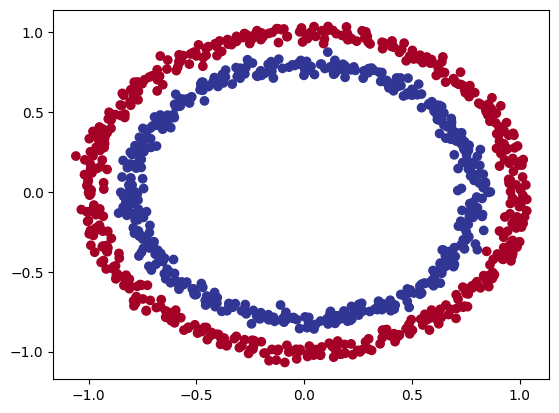

In [62]:
# visualize using matplotlib
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes


In [63]:
# check the input and output shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [64]:
# Check how many samples we have
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Creating a model

In [65]:
# set random seed
tf.random.set_seed(42)

# create a sequential model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.9268 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7650 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7151 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4870


In [66]:
# Let's try to improve our model by training for longer..
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

The model accuracy is only 50%, Now, let's try to add an extra layers, that might improve model's accuracy.

In [67]:
#Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# fit the data
model_2.fit(X, y, epochs=100, verbose=0)

In [68]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

## Improving our model

Let's try some tricks to improve our model.

1. Try adding more layers or increase the number of hidden units within a layer.
2. Choosing a different optimization function such as Adam instead of SGD.
3. Fit our model for more epochs.

In [69]:
# Set random seed
tf.random.set_seed(42)

# create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

# fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [70]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - Accuracy: 0.5090


[0.6973103284835815, 0.5090000033378601]

To visualize model's predictions, let's create a function called `plot_decision_boundary()`.

In [71]:
X.shape

(1000, 2)

In [72]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       (np.linspace(y_min, y_max, 100)))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # check for multiclass
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > 1, it's multi-class
    print(f"The output shape is {model.output_shape}, Doing multiclass clasification...")

    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print(f"The output shape is {model.output_shape},Doing binary classification...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
The output shape is (None, 1),Doing binary classification...


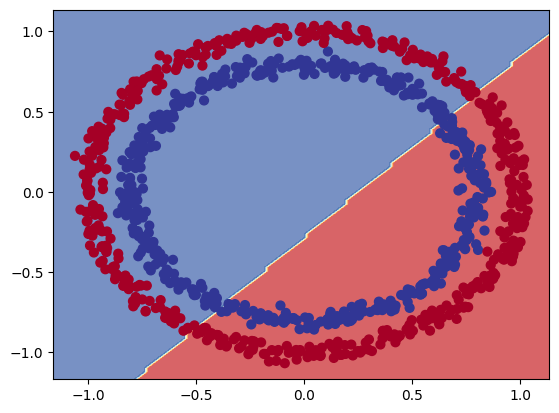

In [73]:
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [74]:
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

This won't work becuase we are compiling our model for binary classification model

In [75]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 10ms/step - loss: 507.1472 - mae: 507.1472
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 389.7600 - mae: 389.7600
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 277.3802 - mae: 277.3802
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 160.6486 - mae: 160.6486
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 56.5708 - mae: 56.5708
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 83.4782 - mae: 83.4782
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 83.0667 - mae: 83.0667
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.1198 - mae: 51.1198
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.1975 - mae: 49.1975
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 47.3839 - mae: 47.3839
Epoch 11/100
5/5 [==============================] 

2/2 [==============================] - 0s 6ms/step


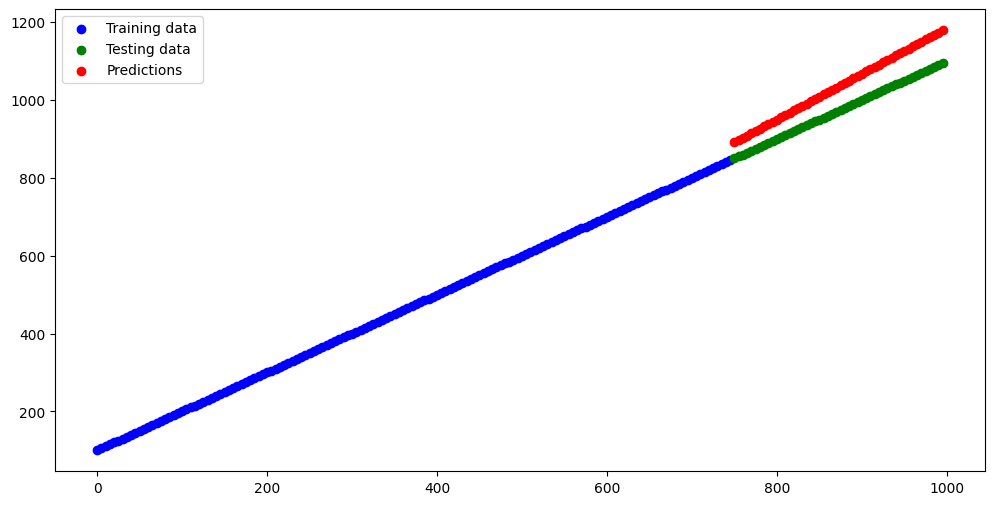

In [76]:
y_reg_preds = model_3.predict(X_reg_test)

# plot the model's predictions against regression data
plt.figure(figsize=(12,6))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

Okay, so we saw our neural network can model straight lines (with ability a little bit better than guessing).

What about non-straight (non-linear) lines?

If we're going to model our classification data (the red and blue circles), we're going to need some non-linear lines.

The main change we'll add to models we've built before is the use of the `activation` keyword.

In [77]:
# Set random seed
tf.random.set_seed(42)

# create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # we can also do activation = "linear"
])

# compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 6ms/step - loss: 4.5809 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.5342 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 4.5222 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4901 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4821 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4475 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 4.4444 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.4371 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 4.4314 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4279 - accuracy: 0.4750
Epoch 11/

our model performs a little worse than guessing.

Let's see our data once.

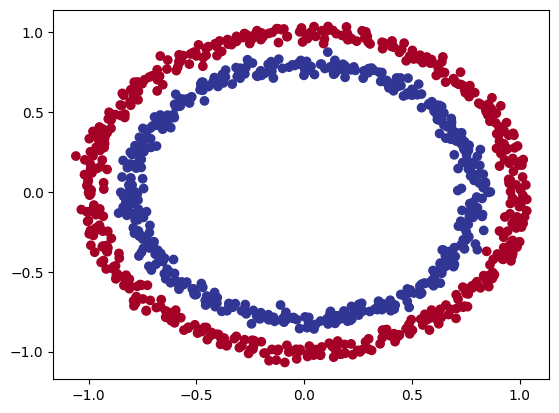

In [78]:
# check our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
The output shape is (None, 1),Doing binary classification...


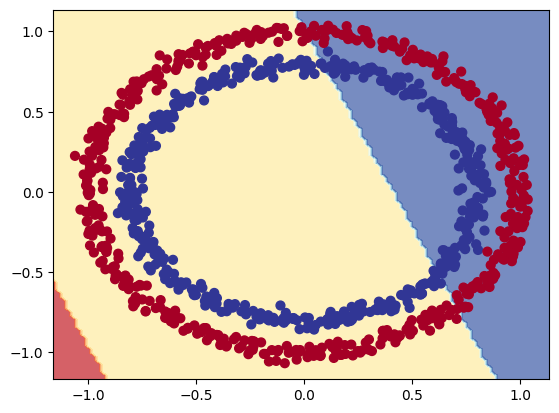

In [79]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [80]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 3.0678 - accuracy: 0.4840


[3.0678207874298096, 0.48399999737739563]

Well, it looks like we're getting a straight (linear) line prediction again.

But our data is non-linear (not a straight line)...

What we're going to have to do is add some non-linearity to our model.

To do so, we'll use the `activation` parameter in on of our layers.

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # we can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # we can also do activation='relu'
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_6.fit(X, y, epochs=100, verbose=0)

313/313 [==============================] - 0s 1ms/step
The output shape is (None, 4), Doing multiclass clasification...


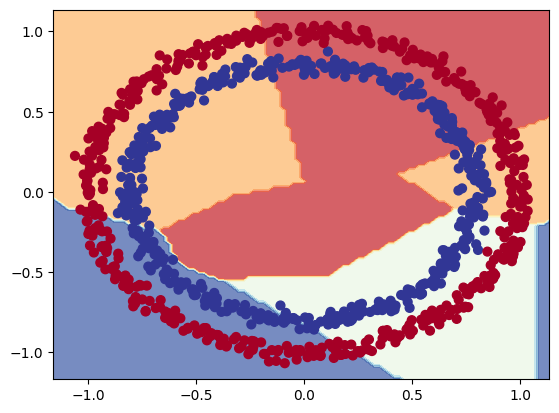

In [83]:
plot_decision_boundary(model_6, X, y)

In [84]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # we can also do activation='relu'
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [85]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9970


[0.18234829604625702, 0.996999979019165]

313/313 [==============================] - 1s 2ms/step
The output shape is (None, 1),Doing binary classification...


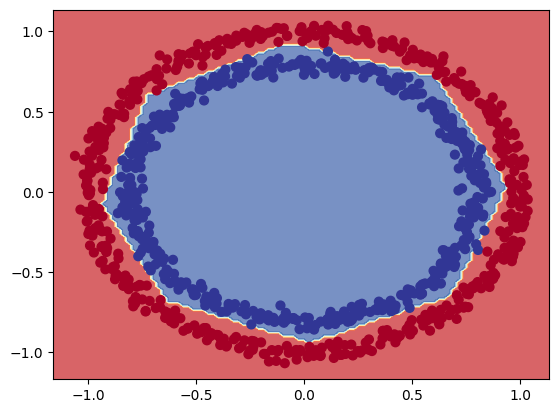

In [86]:
# visualize
plot_decision_boundary(model_7, X, y)

In [87]:
# Set random seed
tf.random.set_seed(42)

# create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

# fit the model
model_8.fit(X, y, epochs=100, verbose=0)

In [88]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0017 - Accuracy: 1.0000


[0.0017253289697691798, 1.0]

313/313 [==============================] - 1s 1ms/step
The output shape is (None, 1),Doing binary classification...


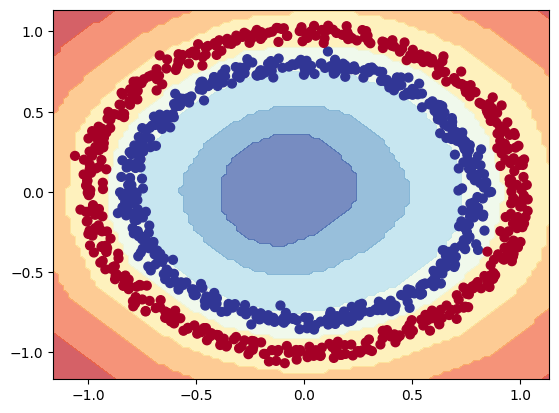

In [89]:
plot_decision_boundary(model_8, X, y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [90]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

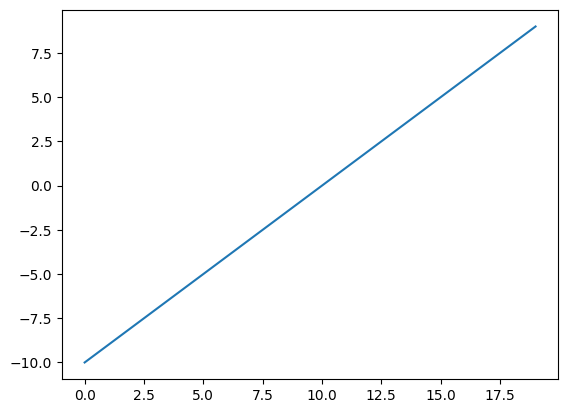

In [91]:
# visualize A
plt.plot(A)

A straight (linear) line!

Now let's recreate the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and see what it does to our data. You can also find a pre-built sigmoid function at [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).

In [92]:
# sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

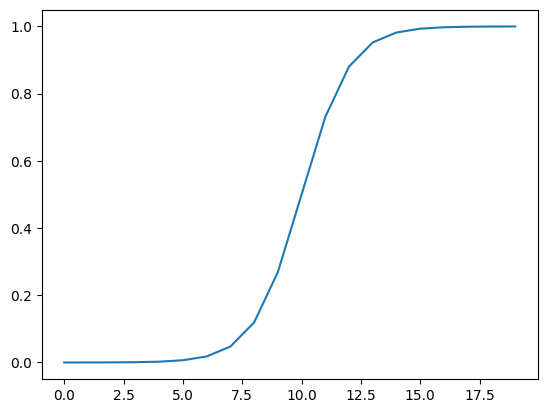

In [93]:
plt.plot(sigmoid(A));

A non-straight (non-linear) line!

Okay, how about the [ReLU function](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function,otherwise%2C%20it%20will%20output%20zero.) (ReLU turns all negatives to 0 and positive numbers stay the same)?

In [96]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

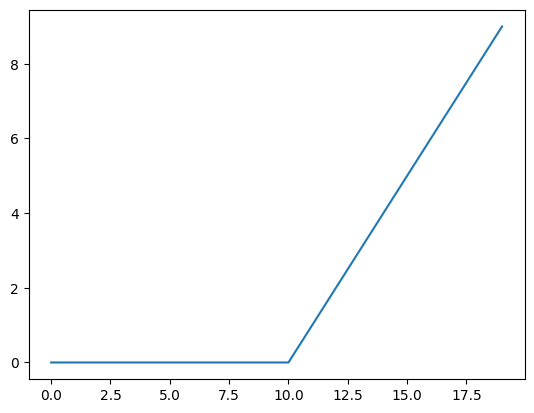

In [97]:
plt.plot(relu(A))

Another non-straight line!

Well, how about TensorFlow's [linear activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear)?

In [98]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [99]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far, We've been evaluating my model using the same data it was trained on.

A more effective method is to divide the data into training, validation (optional), and test sets.

After splitting the data, we'll train the model on the training set (to find patterns in the data) and then assess its performance by making predictions on the test set to see how well it learned those patterns.

Let's go ahead and do that.


In [100]:
# length of our dataset
len(X)

1000

In [101]:
# split the data into train and test
X_train, y_train = X[:800], y[:800] # 80% of the data
X_test, y_test = X[800:], y[800:] # 20% of the data

# check the shapes of the data
X_train.shape, X_test.shape

((800, 2), (200, 2))

Great, now we've got training and test sets, let's model the training data and evaluate what our model has learned on the test set.

In [102]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_9.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4850
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5113
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5788
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6100
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6488
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6375
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.6875
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.7275
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7962
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8288
Epoch 11/25
25/25 [

In [103]:
# Evaluate our model on the test set
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9600
Model loss on the test set: 0.21859565377235413
Model accuracy on the test set: 96.00%


Impressive!

When we started creating `model_8`, we mentioned it would be the same as `model_7`, but that wasn't entirely true. Here's what changed:

* **The `activation` parameter** - Instead of using library paths (`tf.keras.activations.relu`), I used strings (`"relu"` and `"sigmoid"`). In TensorFlow, they both provide the same functionality.
* **The `learning_rate` (also `lr`) parameter** - we increased the **learning rate** in the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) from `0.001` to `0.01` (a 10x increase).
  * Think of the learning rate as how fast a model learns. A higher learning rate means quicker learning, but if it's too high, the model might learn too quickly and not effectively.
* **The number of epochs** - we reduced the number of epochs (using the `epochs` parameter) from 100 to 25. Despite fewer epochs, the model still achieved remarkable results on both the training and test sets.
  * One reason for this is the increased learning rate. Even with fewer epochs (an epoch is a single pass through the training data, so 25 epochs mean the model gets 25 chances to learn), the higher learning rate helped the model learn efficiently.

While the evaluation metrics indicate that the model is performing well, let's visualize its performance.


313/313 [==============================] - 1s 3ms/step
The output shape is (None, 1),Doing binary classification...
313/313 [==============================] - 2s 5ms/step
The output shape is (None, 1),Doing binary classification...


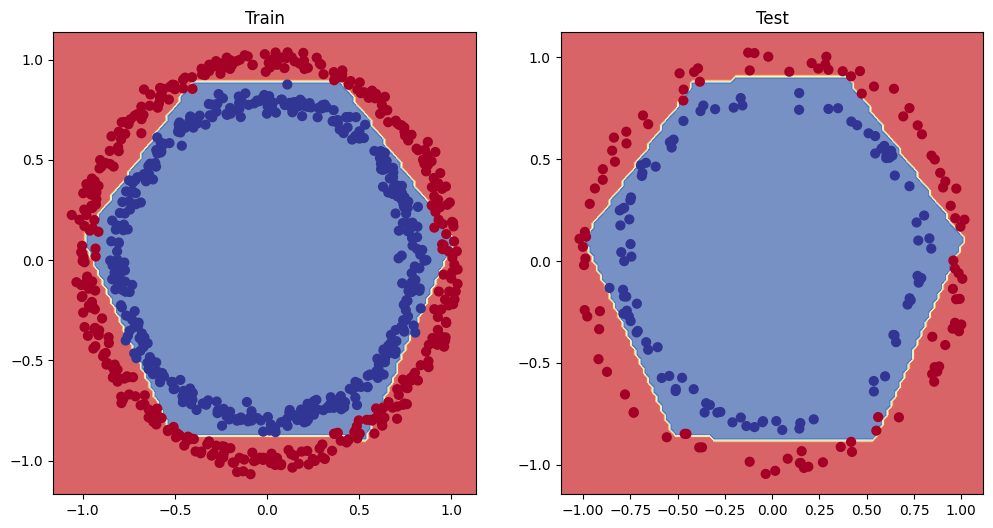

In [104]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)

Check that out! How cool. With a few tweaks, our model is now predicting the blue and red circles almost perfectly.

### Plotting the Loss Curves

Looking at the plots, we can see our model's outputs are very good.

But how did our model perform during the training process?

In other words, how did the performance change each time the model had a chance to look at the data (once per epoch)?

To figure this out, we can examine the **loss curves** (also known as **learning curves**).

You might have noticed we've been using the variable `history` when calling the `fit()` function on a model ([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

This is where we'll find the information on how our model performed during training.

Let's see how we can use it.


In [106]:
# You can access the information variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.697045,0.48500
1,0.692492,0.51125
2,0.688643,0.57875
3,0.683922,0.61000
4,0.678994,0.64875
5,0.670479,0.63750
6,0.657423,0.68750
7,0.639065,0.72750
8,0.614539,0.79625
9,0.586217,0.82875


How does it look (visualize, visualize, visualize).

Text(0.5, 1.0, 'Model_9 Training history')

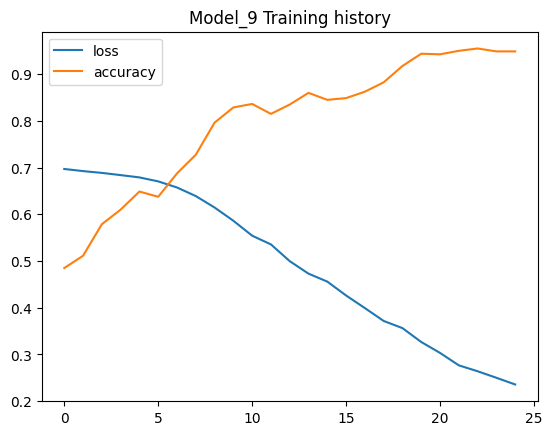

In [107]:
pd.DataFrame(history.history).plot()
plt.title("Model_9 Training history")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

One of the most crucial hyperparameters you can tune for your neural network models is the **learning rate**, aside from the architecture itself (layers, number of neurons, activations, etc).

In `model_8`, we lowered the Adam optimizer's learning rate from the default of `0.001` to `0.01`

To put it simply, it was an educated guess.

we can adjust any of the hyperparameters of your neural networks.

With practice, we'll start to see which hyperparameters work best in different scenarios.

That's a key aspect of machine learning and deep learning in general. It's very experimental. You build a model, evaluate it, and then iterate.

That said, there's technique that can help us find the optimal learning rate (at least to begin training with) for our models going forward.

To do this, we'll use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * Think of a callback as an extra piece of functionality we can add to our model *while* it's training.
* Another model (we could use the same ones as above, but we'll practice building models here).
* A modified loss curves plot.

We'll go through each with code and then see what's happening.

> 🔑 **Note:** The default hyperparameters of many neural network components in TensorFlow are designed to work well right out of the box (e.g., the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings often yield good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.


In [108]:
# Set random seed
tf.random.set_seed(42)

# create a model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(loss='binary_crossentropy',
                 optimizer="Adam",
                 metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model
history = model_10.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.4812 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='Epochs'>

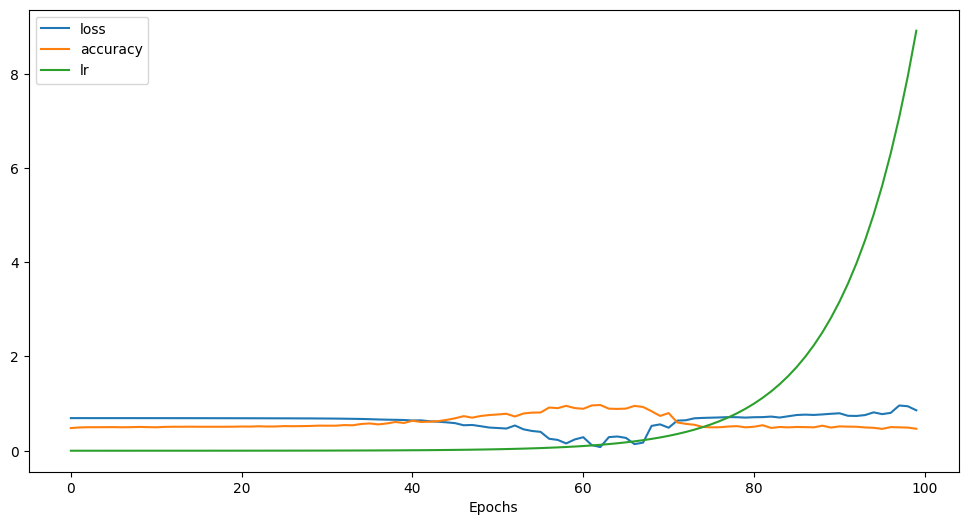

In [109]:
# Checkou the history
pd.DataFrame(history.history).plot(figsize=(12,6), xlabel='Epochs')

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

Text(0.5, 1.0, 'Learning rate vs. Loss')

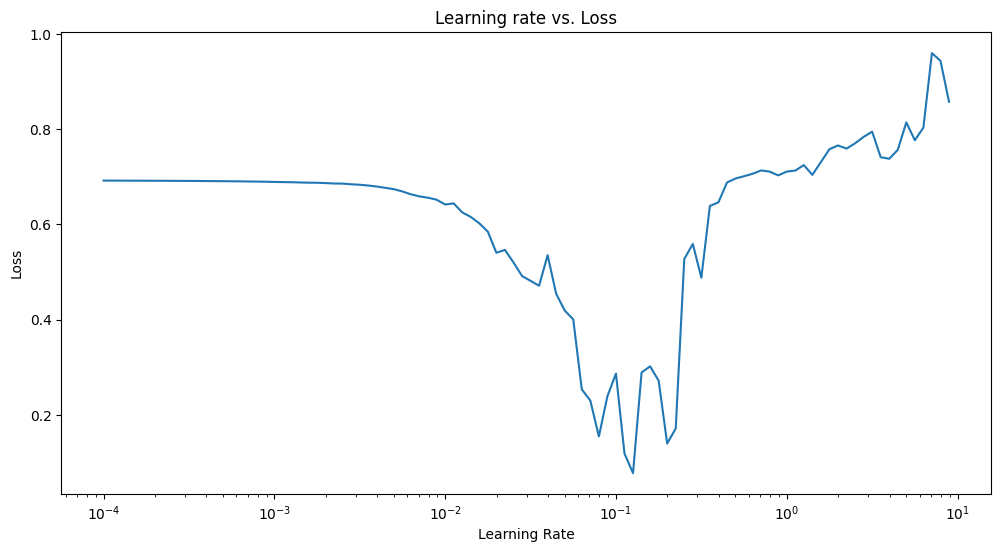

In [110]:
lrs = 1e-4*(10**(np.arange(100)/20))
plt.figure(figsize=(12,6))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be logscale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*


In [111]:
# Example of other typical learning rate values
10**-1, 1e-2, 10**-3, 1e-4

(0.1, 0.01, 0.001, 0.0001)

In [112]:
# Let's try using a higher *ideal* learning rate with the same model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_11.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# Fit the model for 20 epochs (5 less than before)
history = model_11.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.5638
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6225
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6650
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7950
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.8400
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.9362
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2924 - accuracy: 0.9563
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.2103 - accuracy: 0.9613
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.9825
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.1186 - accuracy: 0.9950
Epoch 11/20
25/25 [

Nice! With a little higher learning rate (`0.02` instead of `0.01`) we reach a higher accuracy than `model_8` in less epochs (`20` instead of `25`).




In [113]:
# Evaluate model on the test dataset
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9900


[0.032340239733457565, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
The output shape is (None, 1),Doing binary classification...
313/313 [==============================] - 0s 1ms/step
The output shape is (None, 1),Doing binary classification...


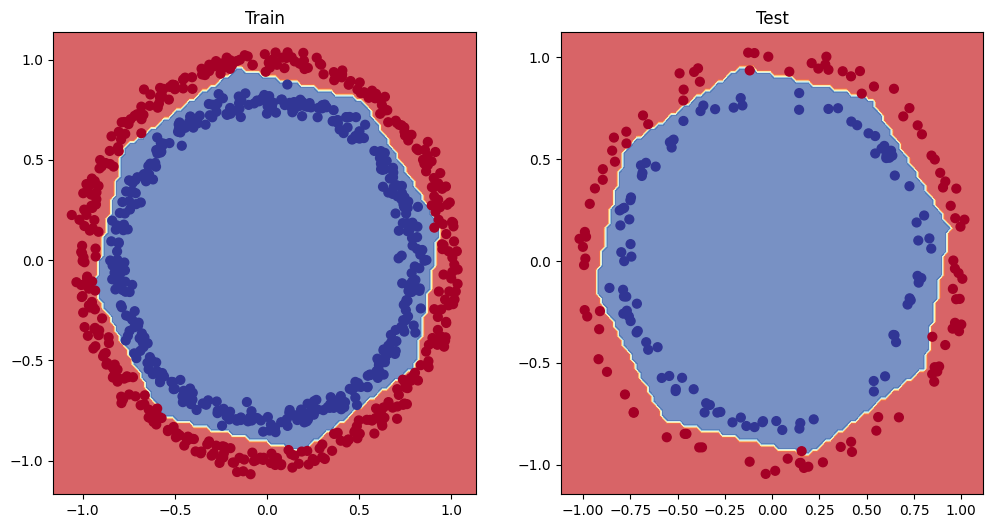

In [114]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show()

And as we can see, the model's performance is almost perfect again.

These types of experiments are common when building your own models.

Begin with the default settings and observe how they perform on your data.

If the performance isn't up to your expectations, make improvements.

Let's explore a few more methods to evaluate our classification models.


### More Classification Evaluation Methods

In addition to the visualizations we've been creating, there are several evaluation metrics to assess our classification models.

| **Metric Name/Evaluation Method** | **Definition** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g., 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](https://tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over the total number of samples. Higher precision leads to fewer false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](https://tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over the total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to fewer false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](https://tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-Score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion Matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) | Compares the predicted values with the true values in a tabular way. If 100% correct, all values in the matrix will be top-left to bottom-right (diagonal line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification Report | Collection of some of the main classification metrics such as precision, recall, and F1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Each classification problem will require different kinds of evaluation methods, but you should be familiar with at least the ones listed above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.


In [115]:
# Check the accuracy of our model
loss, accuracy = model_11.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9900
Model loss on test set: 0.032340239733457565
Model accuracy on test set: 99.00%


How about confusion matrix?

In [118]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [119]:
y_preds = model_11.predict(X_test)
y_preds[:10]

7/7 [==============================] - 0s 2ms/step


array([[9.9593729e-01],
       [9.9905181e-01],
       [9.9823308e-01],
       [9.9740249e-01],
       [3.5449272e-01],
       [5.8080889e-03],
       [9.9664766e-01],
       [3.1810114e-04],
       [9.9901652e-01],
       [5.5007159e-04]], dtype=float32)

Our predictions are in the form of prediction probabilities. we can't plot confusion matrix with those, so we need to convert them into `0` and `1`.


In [120]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [121]:
 # Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_11.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 0, 99]])

Let's make a function to make our confusion matrix more visual!!

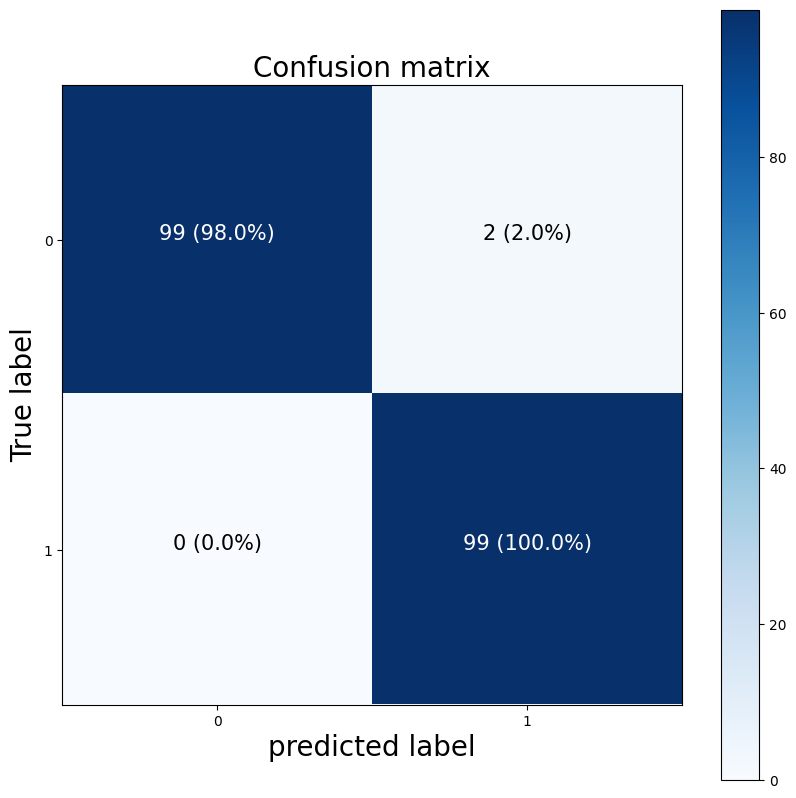

In [122]:
import itertools

figsize=(10,10)

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = conf_mat.astype("float") / conf_mat.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = conf_mat.shape[0]

# Let's prettify it
fig,ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(conf_mat.shape[0])

# Label the axes
ax.set(title="Confusion matrix",
       xlabel="predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (conf_mat.max() + conf_mat.min()) / 2.

#Plot the text on each cell
for i,j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
  plt.text(j, i, f"{conf_mat[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment='center',
           color="white" if conf_mat[i,j] > threshold else "black",
           size=15)

## Working with a Larger Example (Multiclass Classification)

We've explored binary classification (predicting if a data point belongs to one of two classes, like a red circle or blue circle). But what if you have multiple classes?

For instance, imagine you are a fashion company and you want to build a neural network to predict whether a piece of clothing is a shoe, a shirt, or a jacket (three different options).

When you have more than two classes, this is known as **multiclass classification**.

The good news is that the techniques we've learned so far can also be applied to multiclass classification problems with a few adjustments.

Let's see it in action.

First, we need some data. Fortunately, TensorFlow provides a multiclass classification dataset called [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), which allows us to get started immediately.

We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.

> 📖 **Resource:** The following multiclass classification example is adapted from the [TensorFlow classification guide](https://www.tensorflow.org/tutorials/keras/classification). Once you go through the example below, a good exercise would be to replicate the TensorFlow guide on your own.


In [123]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorteed into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Now let's check out an example.

In [124]:
# view the first training example
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [125]:
train_labels[0]

9

In [126]:
# check the shape our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

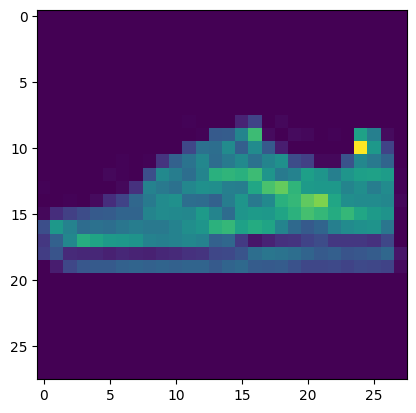

In [127]:
# plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[666]);

In [128]:
# check our sample label
train_labels[666]

7

It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels)).

In [11]:
class_names = ['T-shirt/top','Trouser','Pullover', 'Dress', 'Coat',
               'Sandal;','Shirt','sneaker','Bag','Ankle boot']

len(class_names)

10

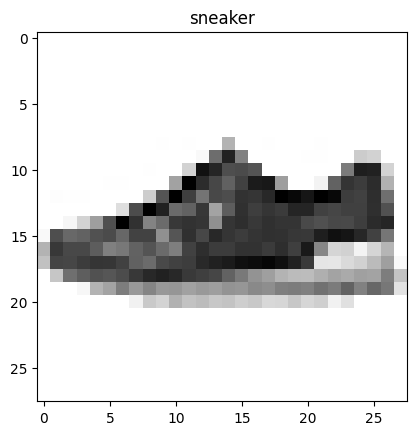

In [ ]:
# plot an example image and its label
index_of_choice = 126
plt.imshow(train_data[index_of_choice], plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

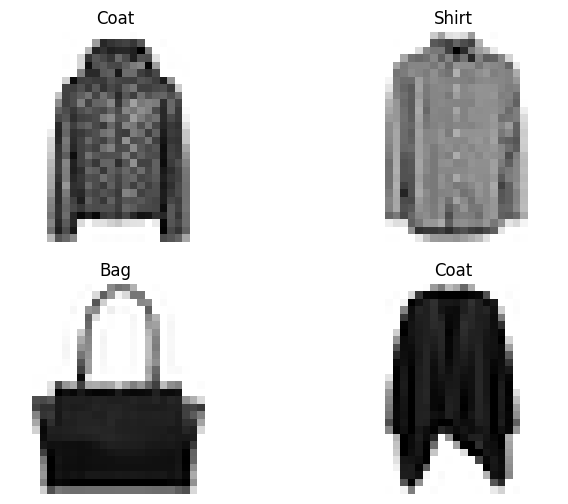

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(8,6))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (in line with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We'll squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict 10 different classes.
  * We'll change the `activation` parameter of our output layer to [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. The `"softmax"` activation function outputs a series of values between 0 and 1 (the same shape as the **output shape**), which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll change our loss function from a binary loss function to a multiclass loss function.
  * Specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy). If our labels were one-hot encoded (e.g., they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

Ready? Let's go.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
fashn_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

fashn_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # different loss function for multiclass classifcation
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

non_norm_history = fashn_model.fit(train_data,
                                   train_labels,
                                   epochs=10,
                                   validation_data=(test_data, test_labels))  # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4711 - accuracy: 0.0980 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9188 - accuracy: 0.2044 - val_loss: 1.6660 - val_accuracy: 0.2933
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6313 - accuracy: 0.2803 - val_loss: 1.6373 - val_accuracy: 0.2756
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6037 - accuracy: 0.2868 - val_loss: 1.5851 - val_accuracy: 0.2842
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5890 - accuracy: 0.3022 - val_loss: 1.5780 - val_accuracy: 0.3226
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5816 - accuracy: 0.3117 - val_loss: 1.5854 - val_accuracy: 0.3201
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5724 - accuracy: 0.3220 - val_loss: 1.5637 - val_accuracy:

Alright, our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the `non_norm_history` variable when calling `fit()`). It's pixel values are between 0 and 255.

Let's see.

In [ ]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# We can also find min and max like this
tf.reduce_min(train_data).numpy(), tf.reduce_max(train_data).numpy()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: `255.0` (dividing by a float also converts to a float).


Doing so will result in all of our data being between 0 and 1 (known as **scaling** or **normalization**).

In [ ]:
# Divide train and test images by the maximum value
train_data = train_data / 255.0
test_data = test_data/ 250.0

# check the min and max values of training data
train_data.min(), train_data.max()

(0.0, 1.0)

We'll use the same model as before `fashn_model` with the normalized data

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
fashn_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
fashn_model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

# fit the model
norm_history = fashn_model2.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.4340 - accuracy: 0.4288 - val_loss: 1.1572 - val_accuracy: 0.5406
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0496 - accuracy: 0.5825 - val_loss: 0.9916 - val_accuracy: 0.6200
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9515 - accuracy: 0.6307 - val_loss: 0.9208 - val_accuracy: 0.6418
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8944 - accuracy: 0.6659 - val_loss: 0.8778 - val_accuracy: 0.6752
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8593 - accuracy: 0.6799 - val_loss: 0.8550 - val_accuracy: 0.6802
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8355 - accuracy: 0.6871 - val_loss: 0.8417 - val_accuracy: 0.6927
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8184 - accuracy: 0.6916 - val_loss: 0.8221 - val_accuracy

Let's plot each model's history (their loss curves).

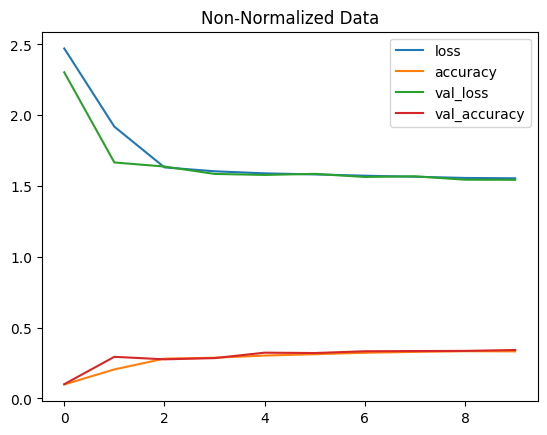

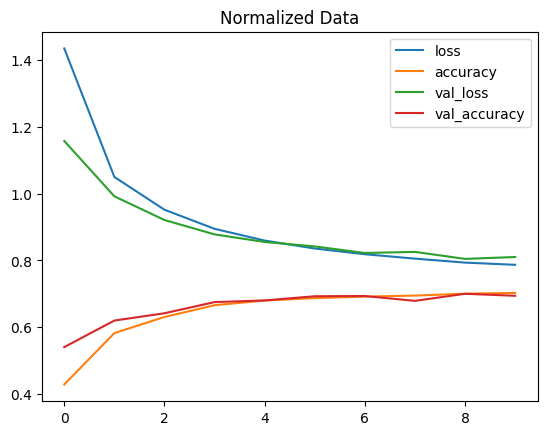

In [ ]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized Data')
# plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized Data');

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g., same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
fashn_model3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
fashn_model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = fashn_model3.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1864 - accuracy: 0.5969 - val_loss: 0.8614 - val_accuracy: 0.7069 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7510 - accuracy: 0.7508 - val_loss: 0.7271 - val_accuracy: 0.7538 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6529 - accuracy: 0.7830 - val_loss: 0.6746 - val_accuracy: 0.7761 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6061 - accuracy: 0.7985 - val_loss: 0.6271 - val_accuracy: 0.7974 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5807 - accuracy: 0.8038 - val_loss: 0.6246 - val_accuracy: 0.7891 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5611 - accuracy: 0.8092 - val_loss: 0.6130 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5

Text(0.5, 1.0, 'Finding the ideal learning rate')

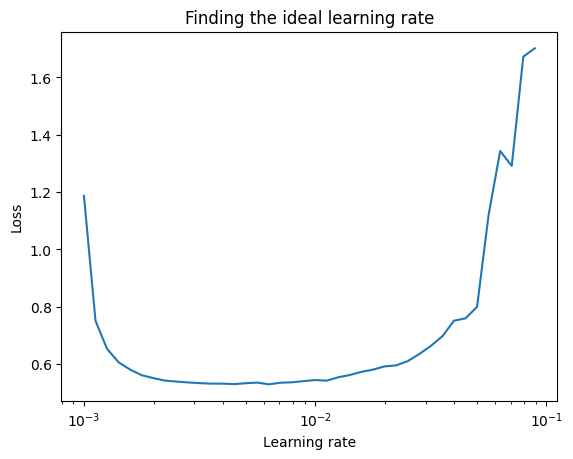

In [ ]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) (`0.001`) is the ideal learning rate.

Let's refit a model using the ideal learning rate.


In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
fashn_model4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
fashn_model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history = fashn_model4.fit(train_data,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3071 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

Now that we've trained a model with a near-ideal learning rate and it is performing well, we have a few options:

* Evaluate its performance using other classification metrics, such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).
* Assess some of its predictions through visualizations.
* Improve its accuracy by training it for longer or changing the architecture.
* Save and export it for use in an application.

Let's go through the first two options.

First, we'll create a confusion matrix to visualize its predictions across the different classes.


In [13]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

We need prediction probabilities to plot confusion_matrix

In [14]:
# Make predictions with the most recent model
y_probs = fashn_model4.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993793, 0.10019223, 0.10045668, 0.09869244],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993793, 0.10019223, 0.10045668, 0.09869244],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993793, 0.10019223, 0.10045668, 0.09869244],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993793, 0.10019223, 0.10045668, 0.09869244],
       [0.10051846, 0.09990153, 0.09993467, 0.09959822, 0.0987547 ,
        0.10201307, 0.09993793, 0.10019223, 0.10045668, 0.09869244]],
      dtype=float32)

Our model outputs a list of **prediction probabilities**, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the [`argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) method.

 >**🔑Note:** Remember we need to make predictions on the same from of data that our model is trained on.*

In [ ]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

Now let's do the same for all of the predictions.

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7])

Now we've got our model's predictions in label form, let's create a confusion matrix to view them against the truth labels.

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[767,   3,  28,  80,   4,   6, 101,   1,  10,   0],
       [  1, 958,  12,  22,   3,   3,   0,   0,   1,   0],
       [ 12,   7, 702,   9, 178,   2,  86,   0,   4,   0],
       [ 37,  32,  17, 808,  53,   5,  44,   0,   4,   0],
       [  1,   1,  97,  16, 813,   0,  63,   0,   9,   0],
       [  0,   0,   0,   0,   0, 902,   0,  39,   6,  53],
       [156,   5, 128,  40, 161,   5, 484,   0,  21,   0],
       [  0,   0,   0,   0,   0,  41,   0, 895,   1,  63],
       [  7,   1,   4,   7,   4,  27,  37,   5, 908,   0],
       [  0,   0,   0,   0,   0,  15,   0,  32,   1, 952]])

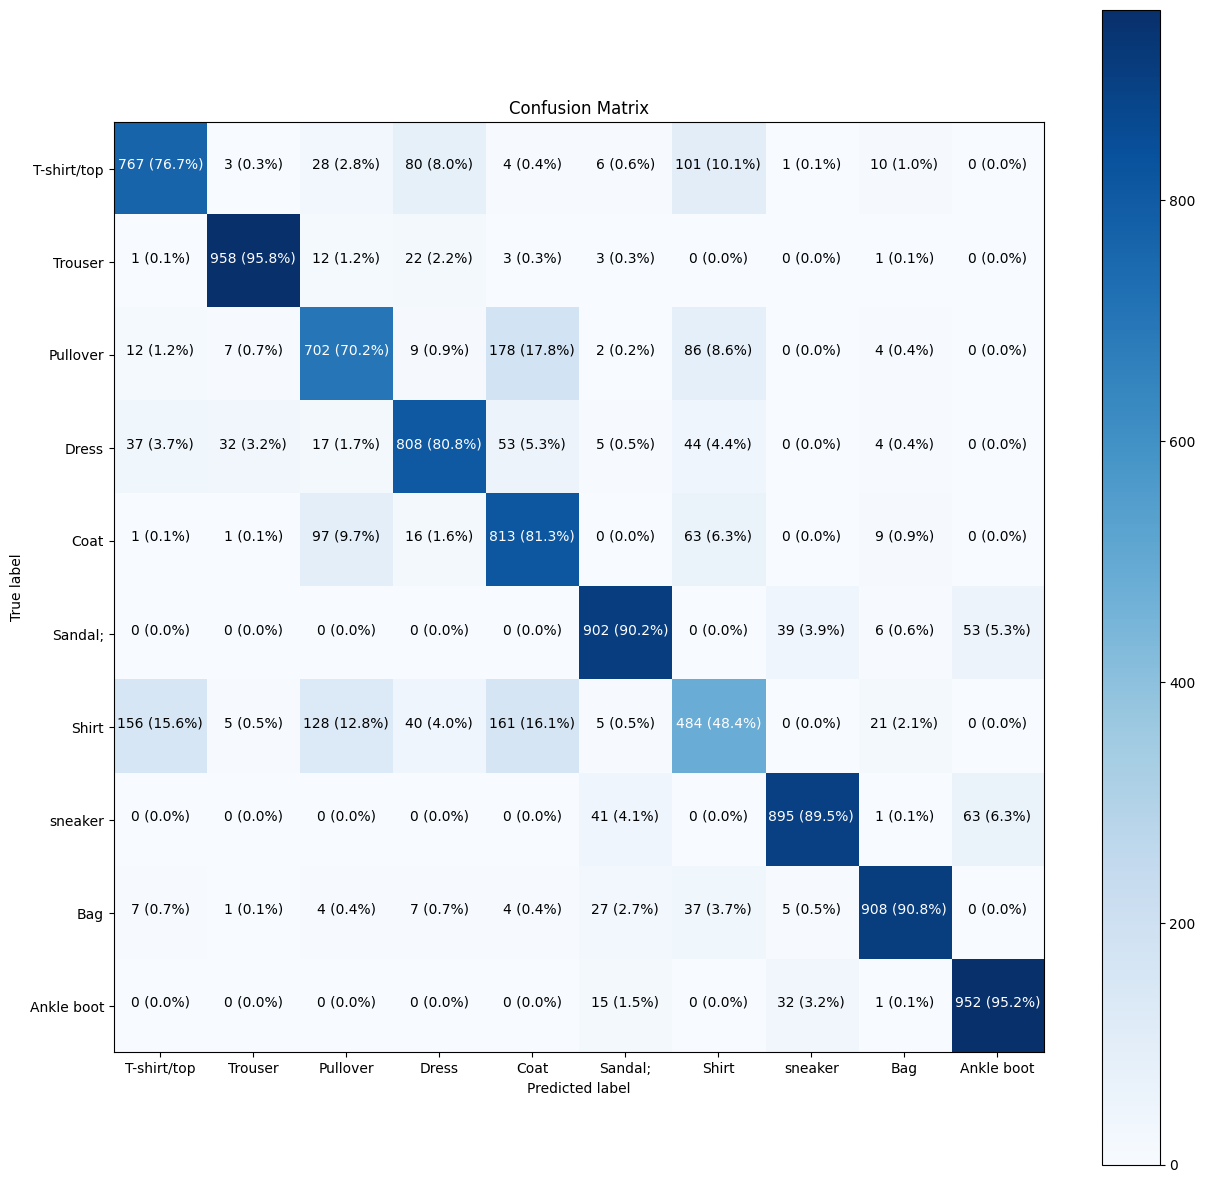

In [ ]:
# Display confusion matrix using function
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(15,15), text_size=10)

That looks much better!
However, the results aren't as good as they could be...

It seems our model is getting confused between the `Shirt` and `T-shirt/top` classes (e.g., predicting `Shirt` when it's actually a `T-shirt/top`).


We've seen how our model's predictions align with the true labels using a confusion matrix, but how about we visualize some predictions?

Let's create a function to plot a random image along with its prediction.

> 🔑 **Note:** When working with images and other forms of visual data, it's often a good idea to visualize as much as possible to develop a deeper understanding of the data and the outputs of your model.


In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
test_data.shape

(10000, 28, 28)

In [15]:
import random

# Create a function for plotting a random image along with it's predictions
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """

  # set up random integer
  i = random.randint(0, len(images))

  # Create predictions and target
  target_image = images[i]
  pred_probs = fashn_model4.predict(target_image.reshape(1, 28, 28)) # Have to reshape because the model is trained on train data which is in the shape of (60000, 28, 28).
  pred_label = classes[pred_probs.argmax()]
  true_label = class_names[true_labels[i]]

  # plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change the color of title based on the prediction
  if pred_label == true_label:
    color = "green"
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 29ms/step


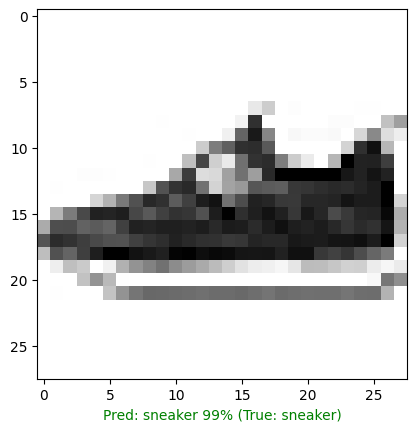

In [ ]:
# check out random image as well as its prediction
plot_random_image(model=fashn_model4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

1/1 [==============================] - 0s 28ms/step


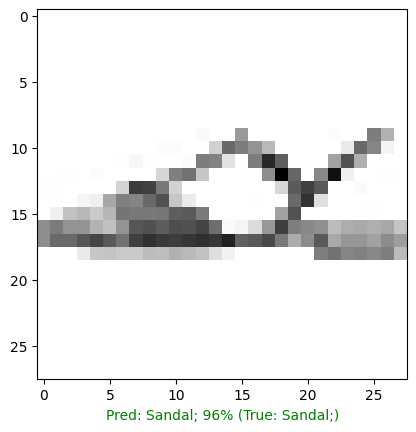

In [ ]:
plot_random_image(model=fashn_model4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

### What patterns is our model learning?


We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

First, we'll get a list of layers in our most recent model (`model_14`) using the `layers` attribute.

In [ ]:
# Find the layers of our most recent model
fashn_model4.layers

We can access a target layer using indexing.

In [ ]:
# Extract a particular layer
fashn_model4.layers[1]

And we can find the patterns learned by a particular layer using the `get_weights()` method.

The `get_weights()` method returns the **weights** (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [ ]:
weights, biases = fashn_model4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.22811523, -0.18313017, -0.43008435,  0.5427782 ],
        [-0.4774987 ,  0.17682603, -0.4596337 ,  0.2122363 ],
        [-0.8435948 , -0.32760322, -0.9744855 ,  0.87071836],
        ...,
        [-0.20156425,  0.4773912 , -0.0675123 ,  0.96059567],
        [-0.28185412,  0.8427846 ,  0.40615603,  0.28145102],
        [-0.2689855 ,  0.408596  , -0.03818059,  0.32238784]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the [`kernel_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) when creating a layer, the default is [`"glorot_uniform"`](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform)) and are then updated to better representative values of the data (non-random) by the neural network during training.

Now let's check out the bias vector.


In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([0.5643686 , 0.2590436 , 0.80658716, 0.6551257 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the [`bias_initializer` parameter](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
# Can now calculate the number of paramters in our model
fashn_model4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_65 (Dense)            (None, 4)                 3140      
                                                                 
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now we've built a few deep learning models, it's a good time to point out the whole concept of inputs and outputs not only relates to a model as a whole but to *every* layer within a model.

You might've already guessed this, but starting from the input layer, each subsequent layer's input is the output of the previous layer.

We can see this clearly using the utility [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

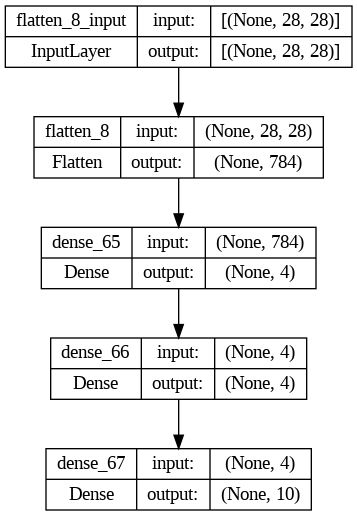

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(fashn_model4, show_shapes=True)

## How a model learns (in brief)

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So, how exactly does a model learn?

A model learns by updating and improving its weight matrices and bias values every epoch (in our case, when we call the `fit()` function).

It does so by comparing the patterns it's learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called [**backpropagation**](https://en.wikipedia.org/wiki/Backpropagation).

In other words, data and labels pass through a model (**forward pass**) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (**backward pass**) and tweaking its weight matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more information.
